# Synchronize homework files

In [1]:
! rm -rf sample_data; curl -s https://raw.githubusercontent.com/mposa/MEAM517/master/sync_hw.py > sync_hw.py
files = ["quadrotor.py", "stability_analysis.py", "create_animation.py", "quad_sim.py","S_sol.npy","nn.py"]

from sync_hw import sync_hw
sync_hw(7, files, True)

Mounted at /content/drive


# Install Drake and set up a server for the visualizer

In [2]:
# Install drake. We are using the lqr controller in drake as the final stabilizing controller.
# The installation process will take about 2 minutes but it's only required in the start of the Colab's virtual machine.
!curl -s https://raw.githubusercontent.com/mposa/MEAM517/master/colab_drake_setup.py > colab_drake_setup.py
from colab_drake_setup import setup
setup()

<IPython.core.display.Javascript object>

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  203M  100  203M    0     0  38.6M      0  0:00:05  0:00:05 --:--:-- 44.4M
Reading package lists...
Building dependency tree...
Reading state information...
libdouble-conversion1 is already the newest version (2.0.1-4ubuntu1).
libdouble-conversion1 set to manually installed.
libglu1-mesa is already the newest version (9.0.0-2.1build1).
libglu1-mesa set to manually installed.
libjsoncpp1 is already the newest version (1.7.4-3).
libjsoncpp1 set to manually installed.
liblapack3 is already the newest version (3.7.1-4ubuntu1).
liblapack3 set to manually installed.
liblz4-1 is already the newest version (0.0~r131-2ubuntu3).
liblzma5 is already the newest version (5.2.2-1.3).
libogg0 is already the newest version (1.3.2-1).
libogg0 set to manually installed.
libtheora0 is already the newest version (1.1.1+dfsg.1-14).
libtheora0 set 

# Problem 1 - Model Predictive Control

Creates the Quadrotor object and loads in the animation code.

**Re-run this block anytime you make change to `quadrotor.py`.**

In [39]:
%matplotlib inline

"""
Simulate quadrotor
"""

import numpy as np
from math import sin, cos, pi, sqrt, atan
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import importlib

# Need to reload the module to use the latest code
import quadrotor
importlib.reload(quadrotor)
from quadrotor import Quadrotor

"""
Load in the animation function
"""
import create_animation
importlib.reload(create_animation)
from create_animation import create_animation

import quad_sim
importlib.reload(quad_sim)
from quad_sim import simulate_quadrotor

# Weights of LQR cost
R = np.eye(2);
Q = np.diag([10, 10, 1, 1, 1, 1]);
Qf = Q;

# End time of the simulation
tf = 10;

# # Construct our quadrotor controller 
# quadrotor = Quadrotor(Q, R, Qf);

## Simulate the quadrotor using MPC as the controller


In [40]:
# Set quadrotor's initial state and simulate
# x0 = np.array([0.5, 0.5, 0, 1, 1, 0])
# x0 = np.array([0, 0, 0, 0, 0, 0])


# x_d = lambda t : np.array([3*cos(t), 3*sin(t), atan(3*cos(t)/(9.81 - 3*sin(t))), -3*sin(t), 3*cos(t), (-3*(1 - 0.305810397553517*sin(t))**2*sin(t) + 0.09351999925184*(9.81 - 3*sin(t))*cos(t)**2)/((9.81 - 3*sin(t))*((1 - 0.305810397553517*sin(t))**2 + 0.09351999925184*cos(t)**2))])
# u_d = lambda t : np.array([5.0e-15*(1000000000000.0*sqrt((90000.0*sin(t)**2 - 588600.0*sin(t) + 90000.0*cos(t)**2 + 962361.0)/(90000.0*sin(t)**2 - 588600.0*sin(t) + 962361.0))*(981.0 - 300.0*sin(t))*(729000000000000.0*sin(t)**6 - 1.430298e+16*sin(t)**5 + 1.458e+15*sin(t)**4*cos(t)**2 + 1.169268615e+17*sin(t)**4 - 1.907064e+16*sin(t)**3*cos(t)**2 - 5.0980111614e+17*sin(t)**3 + 729000000000000.0*sin(t)**2*cos(t)**4 + 9.35414892e+16*sin(t)**2*cos(t)**2 + 1.25028723733335e+18*sin(t)**2 - 4.76766e+15*sin(t)*cos(t)**4 - 2.03920446456e+17*sin(t)*cos(t)**2 - 1.63537570643202e+18*sin(t) + 7.7951241e+15*cos(t)**4 + 1.6670496497778e+17*cos(t)**2 + 8.91279760005452e+17) - 83562883710976.0*sin(t)**5*cos(t) + 5.95957500000008e+28*sin(t)**4*cos(t) - 87960930222080.0*sin(t)**3*cos(t)**3 - 3.89756205000002e+29*sin(t)**3*cos(t) + 5.95957500000003e+28*sin(t)**2*cos(t)**3 + 3.94064967394918e+15*sin(t)**2*cos(t) - 3.89756205e+29*sin(t)*cos(t)**3 + 4.1676241244445e+30*sin(t)*cos(t) + 6.37251395174999e+29*cos(t)**3 - 6.81406544346676e+30*cos(t))/(729000000000000.0*sin(t)**6 - 1.430298e+16*sin(t)**5 + 1.458e+15*sin(t)**4*cos(t)**2 + 1.169268615e+17*sin(t)**4 - 1.907064e+16*sin(t)**3*cos(t)**2 - 5.0980111614e+17*sin(t)**3 + 729000000000000.0*sin(t)**2*cos(t)**4 + 9.35414892e+16*sin(t)**2*cos(t)**2 + 1.25028723733335e+18*sin(t)**2 - 4.76766e+15*sin(t)*cos(t)**4 - 2.03920446456e+17*sin(t)*cos(t)**2 - 1.63537570643202e+18*sin(t) + 7.7951241e+15*cos(t)**4 + 1.6670496497778e+17*cos(t)**2 + 8.91279760005452e+17), 5.0e-15*(1000000000000.0*sqrt((90000.0*sin(t)**2 - 588600.0*sin(t) + 90000.0*cos(t)**2 + 962361.0)/(90000.0*sin(t)**2 - 588600.0*sin(t) + 962361.0))*(981.0 - 300.0*sin(t))*(729000000000000.0*sin(t)**6 - 1.430298e+16*sin(t)**5 + 1.458e+15*sin(t)**4*cos(t)**2 + 1.169268615e+17*sin(t)**4 - 1.907064e+16*sin(t)**3*cos(t)**2 - 5.0980111614e+17*sin(t)**3 + 729000000000000.0*sin(t)**2*cos(t)**4 + 9.35414892e+16*sin(t)**2*cos(t)**2 + 1.25028723733335e+18*sin(t)**2 - 4.76766e+15*sin(t)*cos(t)**4 - 2.03920446456e+17*sin(t)*cos(t)**2 - 1.63537570643202e+18*sin(t) + 7.7951241e+15*cos(t)**4 + 1.6670496497778e+17*cos(t)**2 + 8.91279760005452e+17) + 83562883710976.0*sin(t)**5*cos(t) - 5.95957500000008e+28*sin(t)**4*cos(t) + 87960930222080.0*sin(t)**3*cos(t)**3 + 3.89756205000002e+29*sin(t)**3*cos(t) - 5.95957500000003e+28*sin(t)**2*cos(t)**3 - 3.94064967394918e+15*sin(t)**2*cos(t) + 3.89756205e+29*sin(t)*cos(t)**3 - 4.1676241244445e+30*sin(t)*cos(t) - 6.37251395174999e+29*cos(t)**3 + 6.81406544346676e+30*cos(t))/(729000000000000.0*sin(t)**6 - 1.430298e+16*sin(t)**5 + 1.458e+15*sin(t)**4*cos(t)**2 + 1.169268615e+17*sin(t)**4 - 1.907064e+16*sin(t)**3*cos(t)**2 - 5.0980111614e+17*sin(t)**3 + 729000000000000.0*sin(t)**2*cos(t)**4 + 9.35414892e+16*sin(t)**2*cos(t)**2 + 1.25028723733335e+18*sin(t)**2 - 4.76766e+15*sin(t)*cos(t)**4 - 2.03920446456e+17*sin(t)*cos(t)**2 - 1.63537570643202e+18*sin(t) + 7.7951241e+15*cos(t)**4 + 1.6670496497778e+17*cos(t)**2 + 8.91279760005452e+17)])
# path = lambda y: a*10*y + b*10*y**2 + c*10*y**3 + d*10*sympy.sin(y) + e*10*sympy.log(y) # the function to follow

# ellipse
# A = 0 # linear coefficient
# b = 0 # quadratic coefficient
# c = 0 # cubic coefficient
# d = 0 # sine coefficient
# e = 0 # log coefficient
# f = 1 # exponent on sine coefficient
# gee = 1 # exponent on y position
# h = 0 # coefficient on y position
# l = 0 # frequency of sinusoid
# o = 1 # exponent on sinusoid's frequency
# p = 0 # coefficient of z position
# q = 1 # exponent of z position
# r = -3 # coefficient of time-based sinusoid
# s = 1 # exponent of time-based sinusoid
# v = 1 # frequency of time-based sinusoid
# w = 1 # exponent of time-based sinusoid's frequency
# alpha = -1 # coefficient of y position cosine
# pathName = 'ellipse'
"""
path = lambda y : 5 + p*(tau**q) + A*y + b*(y-6)**2 + c*(y-6)**3 \
    + (d**f)*sympy.sin((l**o)*((y/h)**(1/gee))) + (r**s)*sympy.sin((v**w)*tau) 
"""

# circle
# A = 0 # linear coefficient
# b = 0 # quadratic coefficient
# c = 0 # cubic coefficient
# d = 0 # sine coefficient
# e = 0 # log coefficient
# f = 1 # exponent on sine coefficient
# gee = 1 # exponent on y position
# h = 0 # coefficient on y position
# l = 0 # frequency of sinusoid
# o = 1 # exponent on sinusoid's frequency
# p = 0 # coefficient of z position
# q = 1 # exponent of z position
# r = -3 # coefficient of time-based sinusoid
# s = 1 # exponent of time-based sinusoid
# v = 1 # frequency of time-based sinusoid
# w = 1 # exponent of time-based sinusoid's frequency
# alpha = -3 # coefficient of y position cosine
# pathName = 'circle'
"""
path = lambda y : 5 + p*(tau**q) + A*y + b*(y-6)**2 + c*(y-6)**3 \
+ (d**f)*sympy.sin((l**o)*((y/h)**(1/gee))) + (r**s)*sympy.sin((v**w)*tau)
"""

# Position Accelerating Upward and Coming to a Stop
# eps = 1e-11
# A = eps # linear coefficient
# b = eps # quadratic coefficient
# c = eps # cubic coefficient
# d = eps # sine coefficient
# e = eps # log coefficient
# f = eps # exponent on sine coefficient
# gee = eps # exponent on y position
# h = eps # coefficient on y positions ###### end of old filename coeffs
# l = eps # frequency of sinusoid
# o = eps # exponent on sinusoid's frequency
# p = -1 # coefficient of z position
# q = 1 # exponent of z position
# r = 1 # coefficient of time-based sinusoid
# s = 1 # exponent of time-based sinusoid
# v = 1 # frequency of time-based sinusoid
# w = 1 # exponent of time-based sinusoid's frequency
# alpha = 0 # coefficient of y position cosine
# pathName = str(A)+'_'+str(b)+'_'+str(c)+'_'+str(d)+'_'+str(e)+'_'+str(f)+'_'\
# +str(gee)+'_'+str(h)+'_'+str(l)+'_'+str(o)+'_'+str(p)+'_'+str(q)+'_'+str(r)+\
# '_'+str(s)+'_'+str(v)+'_'+str(w)+'_'+str(alpha)
"""
path = lambda y : 5 + p*(tau**q) + A*y + b*(y-6)**2 + c*(y-6)**3 \
    + (r**s)*sympy.sin((v**w)*tau)
"""

# Position Falling then Accelerating Upward
A = 0.001 # linear coefficient
b = 1 # quadratic coefficient
c = 0.001 # cubic coefficient
d = 0.001 # sine coefficient
e = 0.001 # log coefficient
f = 0.001 # exponent on sine coefficient
gee = 1 # exponent on y position
h = -1 # coefficient on y positions ###### end of old filename coeffs
l = 1 # frequency of sinusoid
o = 1 # exponent on sinusoid's frequency

p = 0 # coefficient of z position
q = 1 # exponent of z position

r = 0 # coefficient of time-based sinusoid
s = 1 # exponent of time-based sinusoid
v = 1 # frequency of time-based sinusoid
w = 1 # exponent of time-based sinusoid's frequency
alpha = 0 # coefficient of y position cosine
pathName = str(A)+'_'+str(b)+'_'+str(c)+'_'+str(d)+'_'+str(e)+'_'+str(f)+'_'\
+str(gee)+'_'+str(h)+'_'+str(l)+'_'+str(o)+'_'+str(p)+'_'+str(q)+'_'+str(r)+\
'_'+str(s)+'_'+str(v)+'_'+str(w)+'_'+str(alpha)
"""
path = lambda y : 5 + p*(tau**q) + A*y + b*(y-11)**2 + c*(y-11)**3 \
+ (d**f)*sympy.sin((l**o)*(((y-5)/h)**(1/gee))) + (r**s)*sympy.sin((v**w)*tau)
"""

# Position Climbing and Slowing Periodically
# A = 1 # linear coefficient
# b = 0.0001 # quadratic coefficient
# c = 1e-5 # cubic coefficient
# d = 3 # sine coefficient
# e = 0.01 # log coefficient
# f = 1 # exponent on sine coefficient
# gee = 1 # exponent on y position
# h = -3 # coefficient on y positions ###### end of old filename coeffs
# l = 1.5 # frequency of sinusoid
# o = 1.1 # exponent on sinusoid's frequency
# p = 0 # coefficient of z position
# q = 1 # exponent of z position
# r = 0 # coefficient of time-based sinusoid
# s = 1 # exponent of time-based sinusoid
# v = 1 # frequency of time-based sinusoid
# w = 1 # exponent of time-based sinusoid's frequency
# alpha = 0 # coefficient of y position cosine
# pathName = str(A)+'_'+str(b)+'_'+str(c)+'_'+str(d)+'_'+str(e)+'_'+str(f)+'_'\
# +str(gee)+'_'+str(h)+'_'+str(l)+'_'+str(o)+'_'+str(p)+'_'+str(q)+'_'+str(r)+\
# '_'+str(s)+'_'+str(v)+'_'+str(w)+'_'+str(alpha)
"""
path = lambda y : p*(tau**q) + A*y + b*(y-6)**2 + c*(y-6)**3 \
+ (d**f)*sympy.sin((l**o)*(((y-5)/h)**(1/gee))) + (r**s)*sympy.sin((v**w)*tau)
"""

# # Position Falling and Slowing Periodically
# A = -1 # linear coefficient
# b = 0.0001 # quadratic coefficient
# c = 1e-5 # cubic coefficient
# d = 3 # sine coefficient
# e = 0.01 # log coefficient
# f = 1 # exponent on sine coefficient
# gee = 1 # exponent on y position
# h = -3 # coefficient on y positions ###### end of old filename coeffs
# l = 1.5 # frequency of sinusoid
# o = 1.1 # exponent on sinusoid's frequency
# p = 0 # coefficient of z position
# q = 1 # exponent of z position
# r = 0 # coefficient of time-based sinusoid
# s = 1 # exponent of time-based sinusoid
# v = 1 # frequency of time-based sinusoid
# w = 1 # exponent of time-based sinusoid's frequency
# alpha = 0 # coefficient of y position cosine
# pathName = str(A)+'_'+str(b)+'_'+str(c)+'_'+str(d)+'_'+str(e)+'_'+str(f)+'_'\
# +str(gee)+'_'+str(h)+'_'+str(l)+'_'+str(o)+'_'+str(p)+'_'+str(q)+'_'+str(r)+\
# '_'+str(s)+'_'+str(v)+'_'+str(w)+'_'+str(alpha)
"""
path = lambda y : 10 + p*(tau**q) + A*y + b*(y-6)**2 + c*(y-6)**3 \
+ (d**f)*sympy.sin((l**o)*(((y-5)/h)**(1/gee))) + (r**s)*sympy.sin((v**w)*tau)
"""


Ns = [10]#[10,11,12,13,14,15,16,17,float('nan')]
firstRun = True
data = np.empty((1,56))
for n in Ns:

  # Construct our quadrotor controller 
  quadrotor = Quadrotor(Q, R, Qf,A,b,c,d,e,f,gee,h,l,o,p,q,r,s,v,w,alpha);

  x0 = quadrotor.x_d(1)
  
  x, u, t, timeCalc, timeNN, Ns = simulate_quadrotor(x0,tf,quadrotor,N=n)

  if (firstRun):
    bestErr = np.ones((t.shape)) * float('inf')
    bestN = np.empty((t.shape))
    firstRun = False

  # find the mean of the velocity magnitude
  xVels = np.empty((1,6))
  for time in t:
    xVels = np.concatenate((xVels,[quadrotor.x_d(time)]),axis=0)
  xVels = xVels[1:,:]
  means = np.mean(np.absolute(xVels[:,3:]),axis=0)
  meanVels = np.linalg.norm(means)

  print('building array for n=%d' % (99 if np.isnan(n) else n))
  for k in range(len(t)):
    time = t[k]
    x_curr = x[k]
    u_curr = u[k]
    if (k == 0):
      x_prev = np.ones((6)) * float('nan') # no previous if at the beginning
      u_prev = np.ones((2)) * float('nan')
      x_d_prev = np.ones((6)) * float('nan')
      u_d_prev = np.ones((2)) * float('nan')
    else:
      x_prev = x[k-1]
      u_prev = u[k-1]
      x_d_prev = quadrotor.x_d(t[k-1])
      u_d_prev = quadrotor.u_d(t[k-1])

    
    # ACTUAL ##########################
    # previous
    yddot_prev = -sin(x_prev[2]) * (u_prev[0] + u_prev[1]) / quadrotor.m
    zddot_prev = -quadrotor.g + cos(x_prev[2]) * (u_prev[0] + u_prev[1]) / quadrotor.m
    thetaddot_prev = quadrotor.a * (u_prev[0] - u_prev[1]) / quadrotor.I

    # current
    yddot = -sin(x_curr[2]) * (u[k,0] + u[k,1]) / quadrotor.m
    zddot = -quadrotor.g + cos(x_curr[2]) * (u[k,0] + u[k,1]) / quadrotor.m
    thetaddot = quadrotor.a * (u[k,0] - u[k,1]) / quadrotor.I
    
    # DESIRED ##########################
    # previous
    yddot_d_prev = -sin(x_d_prev[2]) * (u_d_prev[0] + u_d_prev[1]) / quadrotor.m
    zddot_d_prev = -quadrotor.g + cos(x_d_prev[2]) * (u_d_prev[0] + u_d_prev[1]) / quadrotor.m
    thetaddot_d_prev = quadrotor.a * (u_d_prev[0] - u_d_prev[1]) / quadrotor.I
    
    # current
    x_d = quadrotor.x_d(time)
    u_d = quadrotor.u_d(time)
    yddot_d = -sin(x_d[2]) * (u_d[0] + u_d[1]) / quadrotor.m
    zddot_d = -quadrotor.g + cos(x_d[2]) * (u_d[0] + u_d[1]) / quadrotor.m
    thetaddot_d = quadrotor.a * (u_d[0] - u_d[1]) / quadrotor.I

    # future desired
    if (k == len(t)-1):
      x_dNext = np.ones((6)) * float('nan')
      u_dNext = np.ones((2)) * float('nan')
    else: 
      x_dNext = quadrotor.x_d(t[k+1])
      u_dNext = quadrotor.u_d(t[k+1])
      
    yddot_dNext = -sin(x_dNext[2]) * (u_dNext[0] + u_dNext[1]) / quadrotor.m
    zddot_dNext = -quadrotor.g + cos(x_dNext[2]) * (u_dNext[0] + u_dNext[1]) / quadrotor.m
    thetaddot_dNext = quadrotor.a * (u_dNext[0] - u_dNext[1]) / quadrotor.I


    trajErr = np.linalg.norm(x_d - x_curr)
    err = trajErr + meanVels / 40000 * n
    # add current horizon length to the error and scale it to be on par with the norm error
    if ((err < bestErr[k]) and not(np.isnan(n))):
      bestErr[k] = err
      bestN[k] = n

    newDatum = np.concatenate((x_prev, [yddot_prev, zddot_prev,thetaddot_prev],
                              x_curr,
                              x_d_prev, [yddot_d_prev, zddot_d_prev,thetaddot_d_prev],
                              x_d, [yddot_d, zddot_d,thetaddot_d],
                              x_dNext,[yddot_dNext,zddot_dNext,thetaddot_dNext],
                              u_prev,u_d_prev,u_d,u_dNext,[time],[trajErr],[err],
                              [Ns[k]],[timeCalc[k]],[timeNN[k]]),axis=0)
    data = np.concatenate((data,np.array([newDatum])),axis=0)
    # if (trajErr > 0.1): # if it's this far off course, the rest of the run will be ruined
    #   break 

data = data[1:,:]
print('writing data')
with open('data/valid_'+pathName+'.npy','wb') as f:
  np.save(f,data)
  np.save(f,bestN)
print('done')


# for a circle: target u (from LQR)
# [[0.         0.        ]
#  [5.10025449 5.15821031]
#  [5.09878889 5.15680379]
#  ...
#  [5.10205731 5.15951851]
#  [5.10058738 5.15811302]
#  [5.09911675 5.15670742]]

# print(u)

# anim, fig = create_animation(x, tf)
# plt.close()
# anim

building array for n=10
writing data
done


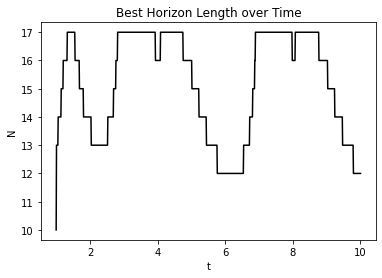

In [ ]:
data[data[:,-1] == 5,:].shape
plt.figure()
plt.plot(t,bestN,'k')
plt.title('Best Horizon Length over Time')
plt.xlabel('t')
plt.ylabel('N')
plt.show()


In [41]:
anim, fig = create_animation(x, tf,quadrotor)
plt.close()
anim

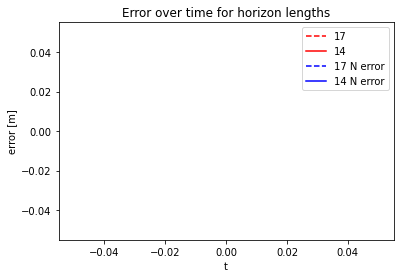

In [ ]:
data
# note: this is trajectory error
errs = data[:,-3]
newErr = data[:,-2]

test = 17
test2 = 14

err12 = errs[data[:,-1]==test]
# err13 = errs[data[:,-1]==13]
# err14 = errs[data[:,-1]==14]
err15 = errs[data[:,-1]==test2]

cons = meanVels / 40000

# newErr12 = newErr[data[:,-1]==test]#test * cons * np.ones_like(err12)
# newErr15 = newErr[data[:,-1]==test2]#test2 * cons * np.ones_like(err15)
newErr12 = test * cons * np.ones_like(err12)
newErr15 = test2 * cons * np.ones_like(err15)

plt.figure()
# plt.plot(t[:len(err12)],err12,'k--')
# plt.plot(t,err13,'k-.')
# plt.plot(t,err14,'k--')
# plt.plot(t[:len(err15)],err15,'k')
plt.plot(t[:len(err12)],newErr12,'r--')
plt.plot(t[:len(err15)],newErr15,'r')
plt.plot(t[:len(err12)],err12+newErr12,'b--')
plt.plot(t[:len(err15)],err15+newErr15,'b')
plt.title('Error over time for horizon lengths')
plt.xlabel('t')
plt.ylabel('error [m]')
plt.legend([str(test),str(test2),str(test) + ' N error',str(test2)+' N error', 'Combined N '+str(test),'Combined '+str(test2)])
plt.show()